In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from discussion import transcript

from utils import process, gather, get_bag

In [2]:
plt.rcParams['figure.figsize'] = 15,15
plt.rcParams['font.size'] = 18

jcolor = 'cornflowerblue'
rcolor = 'grey'

In [3]:
trans = process(transcript)

In [16]:
rd = gather(trans, 'Prof. Richard Dawkins', ['Dr John Lennox','Moderator'])
jl = gather(trans,'Dr John Lennox' , ['Prof. Richard Dawkins','Moderator'])

In [17]:
bjl = get_bag(jl, 40)
brd = get_bag(rd, 40)

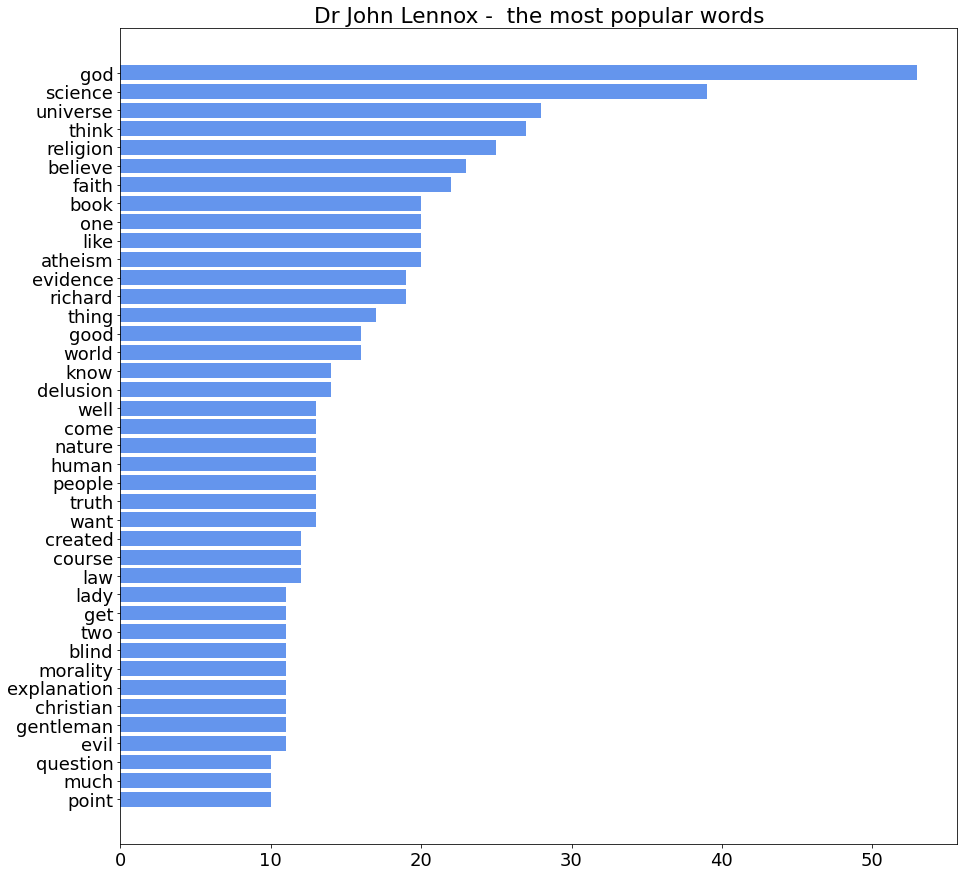

In [18]:
title = 'Dr John Lennox -  the most popular words'

plt.title(title)
plt.barh(range(len(bjl)), bjl.values(), align='center', color=jcolor)
plt.yticks(range(len(bjl)), list(bjl.keys()));
plt.savefig(title.replace(' ','_')+'.png')

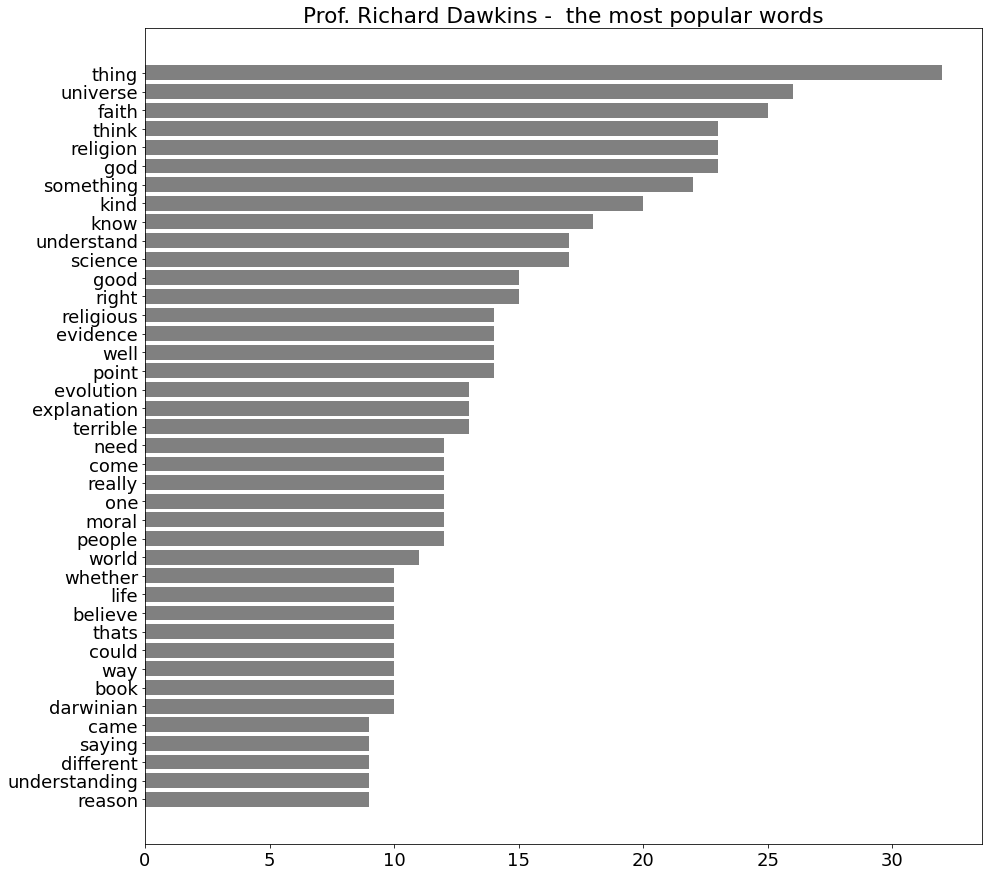

In [19]:
title = 'Prof. Richard Dawkins -  the most popular words'

plt.title(title)
plt.barh(range(len(bjl)), brd.values(), align='center', color=rcolor)
plt.yticks(range(len(bjl)), list(brd.keys()));
plt.savefig(title.replace(' ','_')+'.png')

In [20]:
bjl = get_bag(jl)
brd = get_bag(rd)

In [21]:
onlyj = {k:v for (k,v) in bjl.items() if k not in brd.keys() if v>4}

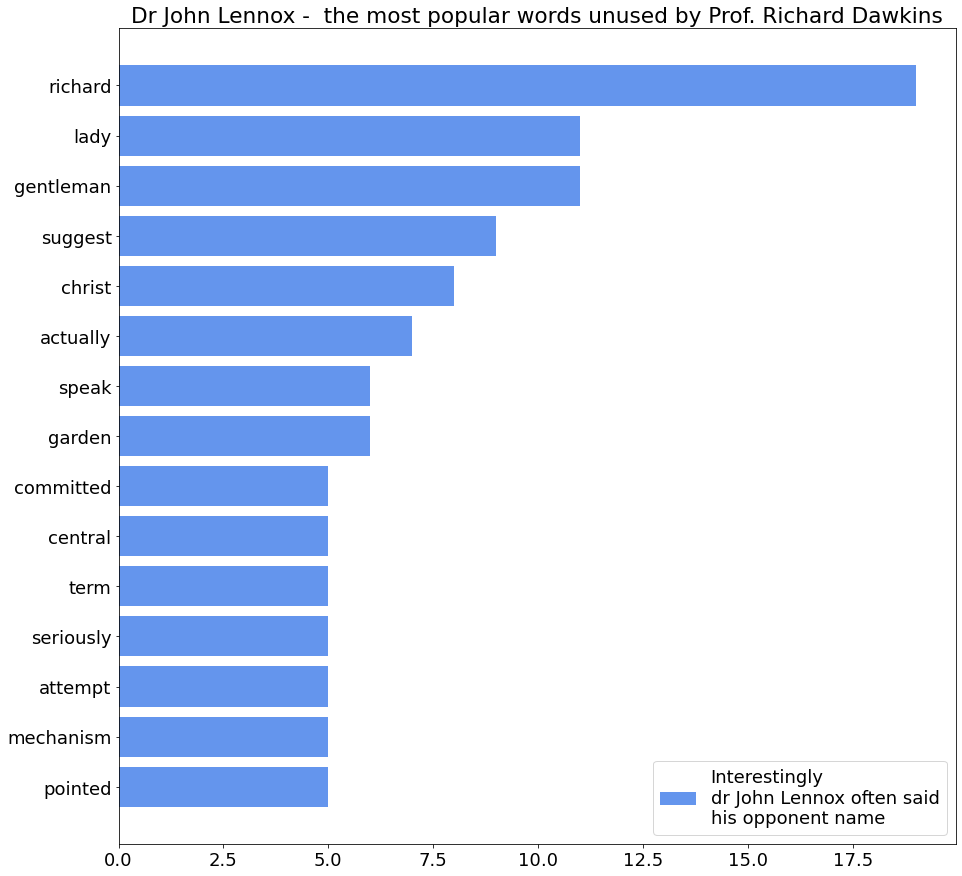

In [26]:
title = 'Dr John Lennox -  the most popular words unused by Prof. Richard Dawkins'

plt.title(title)

tmpbg = onlyj

plt.barh(range(len(tmpbg)), tmpbg.values(), align='center', color=jcolor, 
         label='Interestingly\ndr John Lennox often said\nhis opponent name')
plt.yticks(range(len(tmpbg)), list(tmpbg.keys()));
plt.legend()
plt.savefig(title.replace(' ','_')+'.png')

In [11]:
onlyr = {k:v for (k,v) in brd.items() if k not in bjl.keys() if v>4}

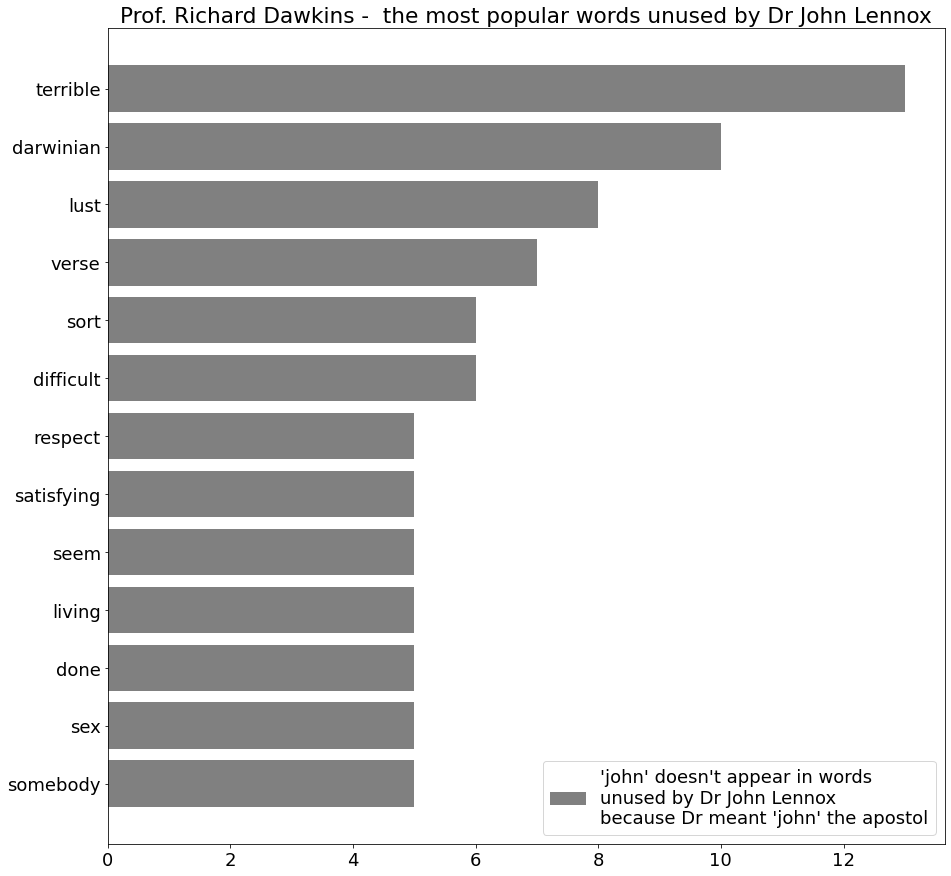

In [25]:
title = 'Prof. Richard Dawkins -  the most popular words unused by Dr John Lennox'

plt.title(title)

tmpbg = onlyr

plt.barh(range(len(tmpbg)), tmpbg.values(), align='center', color=rcolor, label="'john' doesn't appear in words\nunused by Dr John Lennox\nbecause Dr meant 'john' the apostol")
plt.yticks(range(len(tmpbg)), list(tmpbg.keys()));
plt.legend()
plt.savefig(title.replace(' ','_')+'.png')

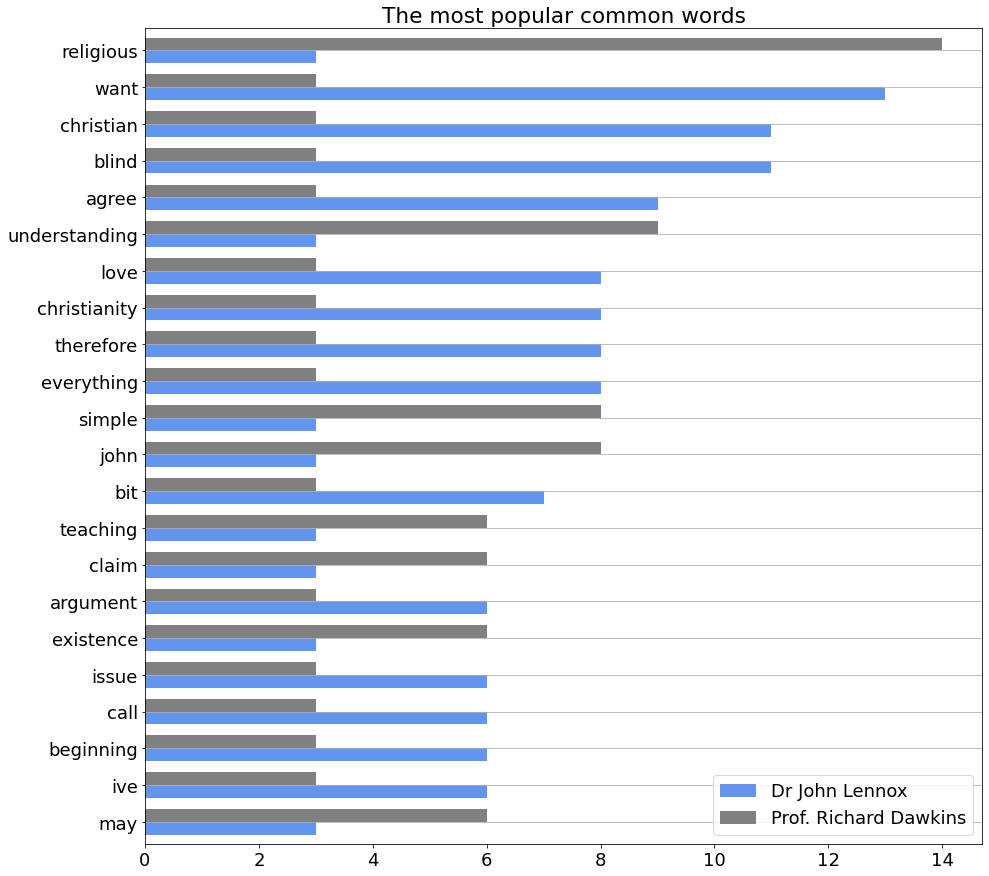

In [24]:
df = pd.concat([pd.Series(bjl).rename('Dr John Lennox'),pd.Series(brd).rename('Prof. Richard Dawkins')],1).dropna()
df = df[df.min(1)==3]
df = df[df.sum(1)>=9]
s = df.sum(1)
df = df.loc[s.sort_values(ascending=True).index]

title = 'The most popular common words'

df.plot.barh(color = [jcolor, rcolor], width=0.7)
plt.grid(axis='y')
plt.title(title)
plt.savefig(title.replace(' ','_')+'.png')